<a href="https://colab.research.google.com/github/akashgardas/Machine-Learning/blob/main/Encoding/Handling_missing_values.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np

## Loading Data & Inspecting

In [5]:
df = pd.read_csv('drive/MyDrive/Tek works/loan_approved.csv')

In [6]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status (Approved)
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [7]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area',
       'Loan_Status (Approved)'],
      dtype='object')

In [8]:
df.shape

(614, 13)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Loan_ID                 614 non-null    object 
 1   Gender                  601 non-null    object 
 2   Married                 611 non-null    object 
 3   Dependents              599 non-null    object 
 4   Education               614 non-null    object 
 5   Self_Employed           582 non-null    object 
 6   ApplicantIncome         614 non-null    int64  
 7   CoapplicantIncome       614 non-null    float64
 8   LoanAmount              592 non-null    float64
 9   Loan_Amount_Term        600 non-null    float64
 10  Credit_History          564 non-null    float64
 11  Property_Area           614 non-null    object 
 12  Loan_Status (Approved)  614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


## Handling missing values

In [10]:
df.isna().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [11]:
# gender (nominal) - fill with mode
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])

In [12]:
# married (nominal) - fill with mode
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])

In [13]:
# dependents
df.Dependents.unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [14]:
# dependents (ordinal) - fill with mode
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])

In [15]:
# self_employed (nominal) - fill with mode
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [16]:
# loan_mean (continuous) - fill with median
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].median())

In [17]:
# loan_amount_term
df.Loan_Amount_Term.unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [18]:
# loan_amount_term (discrete) - fill with mode
# why not median - would be continuous when observations are even no. (avg of two)
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0])

In [19]:
# credit_history
df.Credit_History.unique()

array([ 1.,  0., nan])

In [20]:
# credit_history (nominal - binary categorical) - fill with 0
# (more business/risk perspective)
df['Credit_History'] = df['Credit_History'].fillna(0)

In [21]:
df.isna().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


## Handling duplicates

In [22]:
df.duplicated().sum()

np.int64(0)

In [23]:
df.drop_duplicates(inplace=True)

## Handling Outliers

In [44]:
import seaborn as sns

<Axes: xlabel='CoapplicantIncome', ylabel='Count'>

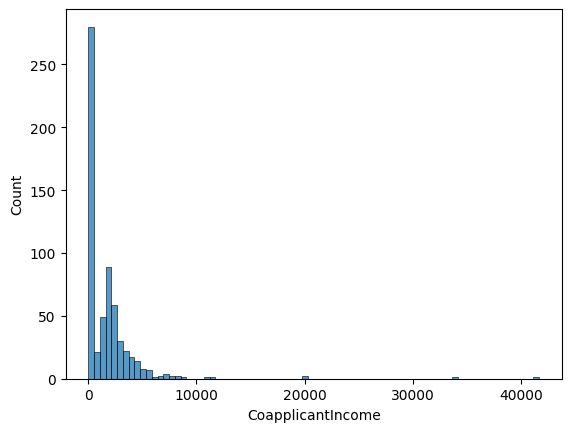

In [46]:
# Identifying
sns.histplot(df['CoapplicantIncome'])

## Encoding values

In [24]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [25]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status (Approved)
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Loan_ID                 614 non-null    object 
 1   Gender                  614 non-null    object 
 2   Married                 614 non-null    object 
 3   Dependents              614 non-null    object 
 4   Education               614 non-null    object 
 5   Self_Employed           614 non-null    object 
 6   ApplicantIncome         614 non-null    int64  
 7   CoapplicantIncome       614 non-null    float64
 8   LoanAmount              614 non-null    float64
 9   Loan_Amount_Term        614 non-null    float64
 10  Credit_History          614 non-null    float64
 11  Property_Area           614 non-null    object 
 12  Loan_Status (Approved)  614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [27]:
# gender (nominal - binary categorical)

print(f'Before: {df['Gender'].unique()}')

df['Gender'] = le.fit_transform(df['Gender'])

print(f'After: {df['Gender'].unique()}')

Before: ['Male' 'Female']
After: [1 0]


In [28]:
# married (nominal - binary categorical)
print(f'Before: {df['Married'].unique()}')

df['Married'] = le.fit_transform(df['Married'])

print(f'After: {df['Married'].unique()}')

Before: ['No' 'Yes']
After: [0 1]


In [29]:
# dependents (ordinal) - order has to be preserved
print(f'Before: {df['Dependents'].unique()}')

df['Dependents'] = le.fit_transform(df['Dependents'])

print(f'After: {df['Dependents'].unique()}')

Before: ['0' '1' '2' '3+']
After: [0 1 2 3]


In [30]:
# education
df['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [31]:
# education (nominal - binary categorical)
print(f'Before: {df['Education'].unique()}')

df['Education'] = le.fit_transform(df['Education'])

print(f'After: {df['Education'].unique()}')

Before: ['Graduate' 'Not Graduate']
After: [0 1]


In [32]:
# self_employed
df['Self_Employed'].unique()

array(['No', 'Yes'], dtype=object)

In [33]:
# self_employed (nominal - binary categorical)
print(f'Before: {df['Self_Employed'].unique()}')

df['Self_Employed'] = le.fit_transform(df['Self_Employed'])

print(f'After: {df['Self_Employed'].unique()}')

Before: ['No' 'Yes']
After: [0 1]


In [34]:
# property_area
df['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [35]:
# property_area (nominal)
print(f'Before: {df['Property_Area'].unique()}')

df['Property_Area'] = le.fit_transform(df['Property_Area'])

print(f'After: {df['Property_Area'].unique()}')

Before: ['Urban' 'Rural' 'Semiurban']
After: [2 0 1]


In [36]:
# loan_status
df['Loan_Status (Approved)'].unique()

array(['Y', 'N'], dtype=object)

In [37]:
# loan_status (nominal - binary categorical), Y - 1, N - 0
print(f'Before: {df['Loan_Status (Approved)'].unique()}')

df['Loan_Status (Approved)'] = le.fit_transform(df['Loan_Status (Approved)'])

print(f'After: {df['Loan_Status (Approved)'].unique()}')

Before: ['Y' 'N']
After: [1 0]


In [38]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status (Approved)
0,LP001002,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


## Extracting useful columns for ML

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Loan_ID                 614 non-null    object 
 1   Gender                  614 non-null    int64  
 2   Married                 614 non-null    int64  
 3   Dependents              614 non-null    int64  
 4   Education               614 non-null    int64  
 5   Self_Employed           614 non-null    int64  
 6   ApplicantIncome         614 non-null    int64  
 7   CoapplicantIncome       614 non-null    float64
 8   LoanAmount              614 non-null    float64
 9   Loan_Amount_Term        614 non-null    float64
 10  Credit_History          614 non-null    float64
 11  Property_Area           614 non-null    int64  
 12  Loan_Status (Approved)  614 non-null    int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 62.5+ KB


In [40]:
# loan_id - doesn't contribute in predicting
# loan_id - drop
df.drop('Loan_ID', axis=1, inplace=True)

In [41]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status (Approved)
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Gender                  614 non-null    int64  
 1   Married                 614 non-null    int64  
 2   Dependents              614 non-null    int64  
 3   Education               614 non-null    int64  
 4   Self_Employed           614 non-null    int64  
 5   ApplicantIncome         614 non-null    int64  
 6   CoapplicantIncome       614 non-null    float64
 7   LoanAmount              614 non-null    float64
 8   Loan_Amount_Term        614 non-null    float64
 9   Credit_History          614 non-null    float64
 10  Property_Area           614 non-null    int64  
 11  Loan_Status (Approved)  614 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 57.7 KB


## Extracting cleaned data

In [43]:
df.to_csv('drive/MyDrive/Tek works/Exported Datasets/loan_approved_cleaned.csv', index=False)